In [1]:
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 28.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 7.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirem

In [2]:
!pip install numpy
!pip install pandas
!pip install matplotlib

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit_aer import AerSimulator

from qiskit.circuit import Instruction, CircuitInstruction, Qubit, QuantumRegister
from qiskit.circuit.library.standard_gates import CXGate, CCXGate, C3XGate, C4XGate, MCXGate

import matplotlib.pyplot as plt

from qiskit.visualization import plot_histogram

import os
import sys
import math as m
import numpy as np
import pandas as pd
import sympy

from functools import *
from traceback import format_exc

In [4]:
def group(list,subListLen):
    if subListLen != 0:
        grouped_list = []

        try:len_list =len(list)
        except TypeError as errordesc:
            if repr(errordesc) == 'TypeError("objec of type \'int\' has no len()")':
                len_list = subListLen+1

        for a in range(0,len_list,int(subListLen)):
            if type(list) == type(0): grouped_list.append('')
            else:grouped_list.append(list[a:a+subListLen])

        if grouped_list == []:grouped_list.append('')

        return grouped_list

    else:
        pass
def afmtsd(the_list_orginal,chara,ndigits):
    #afmtsd - Add For Making The Same Digits
    the_list = list(the_list_orginal)
    a = [chara]*(ndigits-len(the_list))+the_list

    if type(the_list_orginal) == type(''): return''.join(a)

    else:
        return a


def dstatial(the_function,the_list):
    #Do Something To All Things In A List
    the_new_list = []
    for tla in the_list:
        the_new_list.append(the_function(tla))

    return the_new_list

data = [0,1]

nbits = 2
lendata,digits = len(data),nbits*2

numsList = []
ProductCBinFinals = []

RawTable = []

for i in range(lendata**digits):
    nums = [data[(i//lendata**d)%lendata]for d in range(digits)[::-1]]
    numsGrouped = group(nums,nbits)

    nums0 = numsGrouped[0]
    nums1 = numsGrouped[1]

    A,B = np.sum(2**np.arange(digits//2)[::-1]*nums0),np.sum(2**np.arange(digits//2)[::-1]*nums1)
    ProductClassical = A * B

    #Convert the Classical product to its binary

    ProductCBin = list(afmtsd(bin(ProductClassical)[2:],'0',digits))

    #Finalize the Productbin

    ProductCBinFinal = dstatial(int,ProductCBin)

    numsList += [nums]
    ProductCBinFinals += [ProductCBinFinal]

    RawTable.append([i,A,B,nums0,nums1,ProductClassical,nums,ProductCBinFinal])

pd.set_option('display.max_colwidth',None)
#create panfas datafram based on RawTable
Table = pd.DataFrame(RawTable,columns=['i','A','B','nums0','nums1','ProductClassical = A*B','Input Qubits','Output Qubits(ProductCBinFinal)'])
Table = Table.style.set_properties(**{'text-align':'center'})
Table


,i,A,B,nums0,nums1,ProductClassical = A*B,Input Qubits,Output Qubits(ProductCBinFinal)
0,0,0,0,"[0, 0]","[0, 0]",0,"[0, 0, 0, 0]","[0, 0, 0, 0]"
1,1,0,1,"[0, 0]","[0, 1]",0,"[0, 0, 0, 1]","[0, 0, 0, 0]"
2,2,0,2,"[0, 0]","[1, 0]",0,"[0, 0, 1, 0]","[0, 0, 0, 0]"
3,3,0,3,"[0, 0]","[1, 1]",0,"[0, 0, 1, 1]","[0, 0, 0, 0]"
4,4,1,0,"[0, 1]","[0, 0]",0,"[0, 1, 0, 0]","[0, 0, 0, 0]"
5,5,1,1,"[0, 1]","[0, 1]",1,"[0, 1, 0, 1]","[0, 0, 0, 1]"
6,6,1,2,"[0, 1]","[1, 0]",2,"[0, 1, 1, 0]","[0, 0, 1, 0]"
7,7,1,3,"[0, 1]","[1, 1]",3,"[0, 1, 1, 1]","[0, 0, 1, 1]"
8,8,2,0,"[1, 0]","[0, 0]",0,"[1, 0, 0, 0]","[0, 0, 0, 0]"
9,9,2,1,"[1, 0]","[0, 1]",2,"[1, 0, 0, 1]","[0, 0, 1, 0]"


In [5]:
w,x,y,z = sympy.symbols('w,x,y,z')
minterms = [{w:0,x:1},{y:1,z:1,x:1}]
sympy.SOPform([w,x,y,z],minterms)


(x & ~w) | (x & y & z)

In [6]:
ProductCBinFinalsArr = np.array(ProductCBinFinals)
ProductCBinColNum = ProductCBinFinalsArr.shape[1]

termsCompr1 = []
prodinSOPLen = []

# Prepare Raw Table for Boolean Equations
RawTable = []

for i in range(ProductCBinColNum):
    ProductArr = ProductCBinFinalsArr[:, i]
    ProductArr1Indices = np.arange(len(ProductArr))[ProductArr == 1]

    numsArr = np.array(numsList)
    ProductArr1Inputs = numsArr[ProductArr1Indices]

    inputNums = ProductArr1Inputs.shape[1]

    ProductRawEq1 = []
    symbols = [sympy.Symbol('q%s' % QubitIndex) for QubitIndex in range(inputNums)]

    for ProductArr1InputsCont in ProductArr1Inputs:
        ProductRawEq1.append([{symbols[inputIndex]: ProductArr1InputsCont[inputIndex]} for inputIndex in range(len(ProductArr1InputsCont))])

    ProductRawEq2 = np.array(ProductRawEq1)
    ProductRawEq3 = ProductRawEq2.flatten().tolist()

    SOP = sympy.SOPform(symbols, ProductRawEq3)
    SOPProducts = SOP.atoms(sympy.And)

    SOP_NAND = sympy.Not(sympy.And(*SOPProducts))

    termsList = [tuple(str(SOPProduct).split('&')) for SOPProduct in SOPProducts]
    termsCompr1.extend(termsList)
    prodinSOPLen.append(len(termsList))

    RawTable.append([f'q{i + digits}', SOP_NAND])

# Maximize Pandas Column Width
pd.set_option('display.max_colwidth', None)

# Create Pandas DataFrame based on RawTable
Table = pd.DataFrame(RawTable, columns=['Output Qubits', 'Boolean/Logical Equations'])

# Align text leftmost
Table = Table.style.set_properties(**{'text-align': 'left'})

# Align table header center
Table = Table.set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])

Table

,Output Qubits,Boolean/Logical Equations
0,q4,False
1,q5,False
2,q6,False
3,q7,False


In [13]:
termsCompr2 = []
RawTable = []
for termsCompr1Cont in termsCompr1:
    if termsCompr1Cont not in termsCompr2:
        termsCompr2.append(termsCompr1Cont)
    RawTable.append([termsCompr1Cont])

pd.set_option('display.max_colwidth', None)
Table = pd.DataFrame(RawTable, columns=['Inner Logical Qubits'])
TableStyle1 = Table.style.set_properties(**{'text-align': 'left'})
Table.loc['Count'] = Table[['Inner Logical Qubits']].count()

qubitNumsInitial = qubitNums
qubitNums += len(termsCompr2)
print('Number of Qubits:', qubitNums)
Table


Number of Qubits: 20


,Inner Logical Qubits
Count,0


In [12]:
'''termsCompr2 = []
RawTable = []

for termsCompr1Cont in termsCompr1:
  if termsCompr1Cont not in termsCompr2:
    termsCompr2.append(termsCompr1Cont)
    RawTable.append([termsCompr1Cont])

pd.set_option('display.max_colwidth',None)
Table = pd.DataFrame(RawTable,columns = ['Inner Logical Qubits'])

TableStyle1 = Table.style.set_properties(**{'text-align':'left'})

Table.loc['Count'] = Table[['Inner Logical Qubits']].count()


qubitNumsInitial = qubitNums
qubitNums += len(termsCompr2)
print('Number of qubits:',qubitNums)'''


Number of qubits: 20


In [24]:
termsCompr3 = []
for termsCompr2Index in range(len(termsCompr2)):
    targetQubit = (termsCompr2Index + qubitNumsInitial,)
    QubitMCXGCommand = ()
    for controlQubit in termsCompr2[termsCompr2Index]:
        controlQubitProfile = controlQubit.split('q')
        if controlQubitProfile[0]:
            controlQubitProfile = int(controlQubitProfile[1]) + digits * 2
        else:
            controlQubitProfile = int(controlQubitProfile[1])
        QubitMCXGCommand += (controlQubitProfile,)
    termsCompr3.append(QubitMCXGCommand + targetQubit)

print(termsCompr3)

[(0, 1, 2, 3, 12), (0, 2, 11, 13), (0, 2, 9, 14), (1, 2, 11, 15), (1, 2, 8, 16), (0, 3, 9, 17), (0, 3, 10, 18), (1, 3,
19)]

[]


[(0, 1, 2, 3, 12),
 (0, 2, 11, 13),
 (0, 2, 9, 14),
 (1, 2, 11, 15),
 (1, 2, 8, 16),
 (0, 3, 9, 17),
 (0, 3, 10, 18),
 (1, 3, 19)]

In [16]:
  def print_exec(command,sep='',end='\n'):
        print(command,sep=sep,end=end)
        exec(command)

In [17]:
mCirc = QuantumCircuit(qubitNums,digits)


In [35]:
for InputNum in range(digits):
  inverseInputNum = InputNum+digits*2
  print_exec(f'mCirc.cx({InputNum},{inverseInputNum})')
  print_exec(f'mCirc.x({inverseInputNum})')
mCirc.cx(0,8)
mCirc.x(8)
mCirc.cx(1,9)
mCirc.x(9)
mCirc.cx(2,10)
mCirc.x(10)
mCirc.cx(3,11)
mCirc.x(11)

mCirc.cx(0,8)
mCirc.x(8)
mCirc.cx(1,9)
mCirc.x(9)
mCirc.cx(2,10)
mCirc.x(10)
mCirc.cx(3,11)
mCirc.x(11)


In [23]:
operationSOP1 = []
operationSOP1Checkpoint = 0
for operationSOP1Index in prodinSOPLen:
  slicedTerms = termsCompr3[operationSOP1Checkpoint:operationSOP1Checkpoint+operationSOP1Index]
  operationSOP1.append(slicedTerms)
  operationSOP1Checkpoint += operationSOP1Index

print(prodinSOPLen,end = '\n\n\n')
print(operationSOP1,end='\n\n\n')
[1, 2, 4, 1]
[[(0, 1, 2, 3, 12)], [(0, 2, 11, 13), (0, 2, 9, 14)], [(1, 2, 11, 15), (1, 2, 8, 16), (0, 3, 9, 17), (0, 3, 10, 18)], [(1,
3, 19)]]

[0, 0, 0, 0]


[[], [], [], []]




[[(0, 1, 2, 3, 12)],
 [(0, 2, 11, 13), (0, 2, 9, 14)],
 [(1, 2, 11, 15), (1, 2, 8, 16), (0, 3, 9, 17), (0, 3, 10, 18)],
 [(1, 3, 19)]]

In [21]:
for operationSOP1Cont in operationSOP1:
    for SOPProduct in operationSOP1Cont:
        print_exec(f'mCirc.append(MCXGate(num_ctrl_qubits={len(SOPProduct)-1}), {SOPProduct})')
        print_exec(f'mCirc.x({SOPProduct[-1]})', end='\n\n')
    print()

mCirc.append(MCXGate(num_ctrl_qubits=4), (0, 1, 2, 3, 12))
mCirc.x(12)
mCirc.append(MCXGate(num_ctrl_qubits=3), (0, 2, 11, 13))
mCirc.x(13)
mCirc.append(MCXGate(num_ctrl_qubits=3), (0, 2, 9, 14))
mCirc.x(14)
mCirc.append(MCXGate(num_ctrl_qubits=3), (1, 2, 11, 15))
mCirc.x(15)
mCirc.append(MCXGate(num_ctrl_qubits=3), (1, 2, 8, 16))
mCirc.x(16)
mCirc.append(MCXGate(num_ctrl_qubits=3), (0, 3, 9, 17))
mCirc.x(17)
mCirc.append(MCXGate(num_ctrl_qubits=3), (0, 3, 10, 18))
mCirc.x(18)
mCirc.append(MCXGate(num_ctrl_qubits=2), (1, 3, 19))
mCirc.x(19)


In [22]:
operationSOP2 = []
for operationSOP1Index in range(len(operationSOP1)):
    operationSOP1Cont = operationSOP1[operationSOP1Index]
    opSOP1ControlQubits = tuple(operationSOP1aCont[-1] for operationSOP1aCont in operationSOP1Cont)
    opSOP1TargetQubits = (operationSOP1Index + digits,)
    operationSOP2Cont = opSOP1ControlQubits + opSOP1TargetQubits
    operationSOP2.append(operationSOP2Cont)

print(operationSOP2, end='\n\n\n')
[(12, 4), (13, 14, 5), (15, 16, 17, 18, 6), (19, 7)]


[(4,), (5,), (6,), (7,)]




[(12, 4), (13, 14, 5), (15, 16, 17, 18, 6), (19, 7)]

In [28]:
for operationSOP2Cont in operationSOP2:
    if len(operationSOP2Cont) > 1:
        print_exec(f'mCirc.append(MCXGate(num_ctrl_qubits={len(operationSOP2Cont)-1}), {operationSOP2Cont})')
        print_exec(f'mCirc.x({operationSOP2Cont[-1]})', end='\n\n')

mCirc.append(MCXGate(num_ctrl_qubits=1), (12, 4))
mCirc.x(4)
mCirc.append(MCXGate(num_ctrl_qubits=2), (13, 14, 5))
mCirc.x(5)
mCirc.append(MCXGate(num_ctrl_qubits=4), (15, 16, 17, 18, 6))
mCirc.x(6)
mCirc.append(MCXGate(num_ctrl_qubits=1), (19, 7))
mCirc.x(7)


In [29]:
mCirc.measure(np.arange(digits)+digits,range(digits)[::-1])

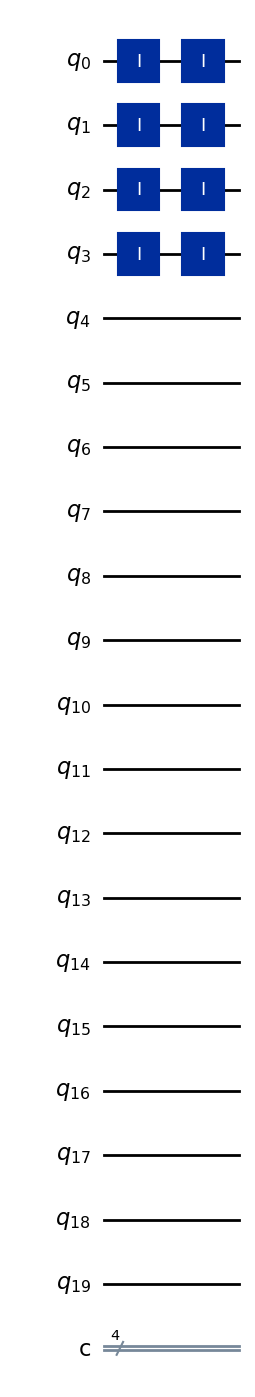

In [33]:
inputDet = sum([mCirc.data[i][0].name == 'x' or mCirc.data[i][0].name == 'id' for i in range(min(digits, len(mCirc.data)))]) == digits

if inputDet < digits:
    initGates = []

    for inputIndex in range(digits):
        qubit = mCirc.qubits[inputIndex]
        initGates.append((Instruction('id', 1, 0, []), [qubit], []))

    mCirc.data = initGates + mCirc.data

mCirc.draw(output='mpl')
